In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [3]:
frame = pd.read_csv('fake_or_real_news.csv')

In [5]:
frame.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
#Setting the DataFrame index (row labels) using one or more existing columns
frame = frame.set_index("Unnamed: 0")
frame.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
y = frame.label
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [11]:
frame.drop("label", axis=1).head(5)

,title,text
Unnamed: 0,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [14]:
X_train, X_test, y_train, y_test = train_test_split(frame['text'], y, test_size=0.40, random_state=101)

In [15]:
X_train.head()

Unnamed: 0
9033     There’s no clear consensus as of yet whether t...
219      Paul D. Ryan is a bit of a control freak: Each...
5741       WashingtonsBlog \nBy Robert Parry, the inves...
10078    Iceland’s Pirate Party Makes Strong Showing in...
6406     By Claire Bernish at thefreethoughtproject.com...
Name: text, dtype: object

In [16]:
y_train.head()

Unnamed: 0
9033     FAKE
219      REAL
5741     FAKE
10078    FAKE
6406     FAKE
Name: label, dtype: object

# Building Vectorizer Classifiers

1. Using Count Vectorizer 

In [17]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [31]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:5])

['00', '000', '000000031', '00000031', '000035']


2. By Using Tf-IDF Vectorizer

In [18]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [30]:
print(tfidf_vectorizer.get_feature_names()[:5])

['00', '000', '000000031', '00000031', '000035']


Values of Token Generated by Both The Vectorizers Are Same


In [28]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()


In [29]:
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,000000031,00000031,000035,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,عربي,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Confusion Matrix

In [34]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# TFIDF Confusion Matrix

accuracy:   0.824
Confusion matrix, without normalization


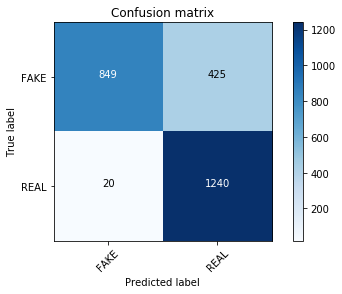

In [35]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Count Vectorizer (aka Bag of Words ) Confusion Matrix

accuracy:   0.888
Confusion matrix, without normalization


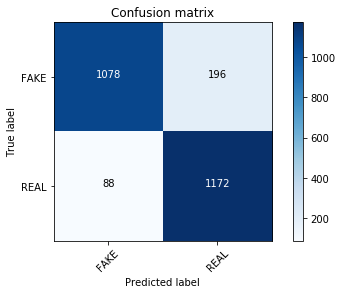

In [36]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Drawing Confusion Matrix With Passive Agressive Classifier

accuracy:   0.927
Confusion matrix, without normalization


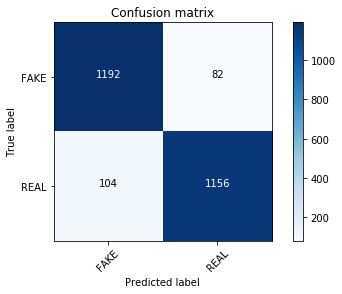

In [43]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [44]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.231976205922679 2016
FAKE -4.427716140185471 october
FAKE -3.342221451773635 hillary
FAKE -2.809635199338509 article
FAKE -2.6661746090269527 source
FAKE -2.487768088052512 corporate
FAKE -2.4756619645516578 november
FAKE -2.3358518236608985 print
FAKE -2.3017625610963 share
FAKE -2.2100627180206485 oct
FAKE -2.205131593200475 establishment
FAKE -2.131786961064828 podesta
FAKE -2.0599226346219637 advertisement
FAKE -2.038441739135726 com
FAKE -1.9697609615433584 election
FAKE -1.9315496047232525 fbi
FAKE -1.9092943469217147 28
FAKE -1.899857759691806 mosul
FAKE -1.8731049560239537 war
FAKE -1.8610198424312623 comments
FAKE -1.8117319782931223 donald
FAKE -1.7569203122114705 uk
FAKE -1.6737041433368969 26
FAKE -1.6558843005259432 demand
FAKE -1.5591765719927468 email
FAKE -1.558541071937099 just
FAKE -1.5583553124652274 north
FAKE -1.5539016857061814 bonuses
FAKE -1.5518246263360325 corruption
FAKE -1.5373926018827582 reno

REAL 5.2232970740896105 said
REAL 3.328579741410539 say

In [45]:
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.507363150730448, 'said'),
 (-4.583032450105099, 'trump'),
 (-5.007570914125925, 'clinton'),
 (-5.474921640404606, 'people'),
 (-5.535450505825239, 'president'),
 (-5.55075971679611, 'obama'),
 (-5.561004856941489, 'state'),
 (-5.603939667283523, 'new'),
 (-5.634620539833227, 'campaign'),
 (-5.723867651320129, 'republican'),
 (-5.855669222806888, 'party'),
 (-5.947584573662047, 'like'),
 (-5.970793240732565, 'just'),
 (-5.985151595514938, 'time'),
 (-6.006648554019641, 'states'),
 (-6.019772101949449, 'house'),
 (-6.054266003219832, 'percent'),
 (-6.082462925583656, 'sanders'),
 (-6.127042557216745, 'republicans'),
 (-6.132449304229192, 'political')]

In [46]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-13.747747644055007, '000035'),
 (-13.747747644055007, '0001'),
 (-13.747747644055007, '0002'),
 (-13.747747644055007, '000billion'),
 (-13.747747644055007, '000km'),
 (-13.747747644055007, '0011'),
 (-13.747747644055007, '004s'),
 (-13.747747644055007, '005s'),
 (-13.747747644055007, '006s'),
 (-13.747747644055007, '007s'),
 (-13.747747644055007, '008s'),
 (-13.747747644055007, '00am'),
 (-13.747747644055007, '00p'),
 (-13.747747644055007, '00pm'),
 (-13.747747644055007, '014'),
 (-13.747747644055007, '015'),
 (-13.747747644055007, '01am'),
 (-13.747747644055007, '023'),
 (-13.747747644055007, '030'),
 (-13.747747644055007, '031')]

In [47]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
for i in tokens_with_weights:
    print(i)
    break

('00', -11.039697442952797)
